In [ ]:
!pip install spacy stanza textstat pymorphy2 --quiet
!python -m spacy download ru_core_news_md --quiet

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.6/176.6 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.4/608.4 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 MB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.9/53.9 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 69.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependen

In [ ]:
!pip install spacy

In [ ]:
!pip install pymorphy3 --quiet


In [ ]:
!pip install language_tool_python --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 1.6 MB/s eta 0:00:00


In [ ]:
import language_tool_python
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [ ]:
import spacy
import stanza
import pymorphy2

In [ ]:
import textstat

In [ ]:
import pymorphy3
morph = pymorphy3.MorphAnalyzer()


In [ ]:
stanza.download("ru")

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Downloading default packages for language: ru (Russian) ...


INFO:stanza:Downloaded file to /root/stanza_resources/ru/default.zip
INFO:stanza:Finished downloading models and saved to /root/stanza_resources


In [ ]:
nlp_spacy = spacy.load("ru_core_news_md")
nlp_stanza = stanza.Pipeline("ru", processors="tokenize,pos,lemma,depparse")


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: ru (Russian):
| Processor | Package            |
----------------------------------
| tokenize  | syntagrus          |
| pos       | syntagrus_charlm   |
| lemma     | syntagrus_nocharlm |
| depparse  | syntagrus_charlm   |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Done loading processors!


In [ ]:
tool = language_tool_python.LanguageTool('ru')

In [ ]:
def get_error_metrics(text):
    """
    Robust error counting for Russian using LanguageTool.
    Filters out 'CASING' noise to focus on deep proficiency signals.
    """
    try:
        matches = tool.check(text)
    except:
        return 0.0, 0.0

    grammar_errors = 0
    spelling_errors = 0

    for match in matches:
        rule_id = getattr(match, 'ruleId', '').upper()
        category = getattr(match, 'category', '').upper()


        if 'CASING' in category or 'UPPERCASE_SENTENCE_START' in rule_id:
            continue


        is_spelling = (
            'SPELLER' in rule_id or
            'MORFOLOGIK' in rule_id or
            'TYPOS' in category
        )


        if is_spelling:
            spelling_errors += 1
        else:
            grammar_errors += 1

    token_count = len(text.split())
    if token_count == 0:
        return 0.0, 0.0

    spelling_rate = (spelling_errors / token_count) * 100
    grammar_rate = (grammar_errors / token_count) * 100

    return spelling_rate, grammar_rate

In [ ]:
tool.check('Я видю')

[Match({'rule_id': 'MORFOLOGIK_RULE_RU_RU', 'message': 'Возможно найдена орфографическая ошибка.', 'replacements': ['ведь', 'вид', 'веда', 'федю', 'иею', 'вею', 'вед', 'ведаю', 'ведд', 'веде', 'веди', 'ведою', 'ведя', 'веду', 'веды', 'велю', 'веню', 'верю', 'вида', 'видаю', 'виде', 'видя', 'виду', 'видь', 'виды', 'вилю', 'виню', 'витю', 'Федю', 'вид ю'], 'offset_in_context': 2, 'context': 'Я видю', 'offset': 2, 'error_length': 4, 'category': 'TYPOS', 'rule_issue_type': 'misspelling', 'sentence': 'Я видю'})]

In [ ]:
tool.check('Два столы.')

[Match({'rule_id': 'Sklonenije_NUM_NN', 'message': 'Числительное не согласуется с существительным по падежу: «Два стола».', 'replacements': ['Два стола'], 'offset_in_context': 0, 'context': 'Два столы.', 'offset': 0, 'error_length': 9, 'category': 'GRAMMAR', 'rule_issue_type': 'uncategorized', 'sentence': 'Два столы.'})]

In [ ]:
get_error_metrics('Я видю')

(50.0, 0.0)

In [ ]:
get_error_metrics('Два столы.')

(0.0, 50.0)

In [ ]:
def mattr(tokens, window=50):
    """Moving-Average Type Token Ratio."""
    if len(tokens) < window:
        return len(set(tokens)) / len(tokens)
    scores = []
    for i in range(len(tokens) - window + 1):
        window_tokens = tokens[i:i+window]
        scores.append(len(set(window_tokens)) / window)
    return np.mean(scores)

In [ ]:
def extract_features(text):
    # Run NLP Pipelines
    doc_spacy = nlp_spacy(text)
    doc_stanza = nlp_stanza(text)

    # Basic Stats
    sentences = list(doc_spacy.sents)
    tokens = [t for t in doc_spacy]
    words = [t.text for t in tokens if t.is_alpha] # Filter punctuation

    num_sentences = len(sentences) if len(sentences) > 0 else 1
    num_tokens = len(tokens) if len(tokens) > 0 else 1
    num_words = len(words)

    # Sentence / Token Lengths
    sent_lengths_chars = [len(s.text) for s in sentences]
    sent_lengths_tokens = [len([t for t in s if t.is_alpha]) for s in sentences]
    token_lengths_chars = [len(w) for w in words]

    def stats(arr):
        if len(arr) == 0: return (0,0,0,0)
        return (np.mean(arr), np.median(arr), np.min(arr), np.max(arr))

    mean_sc, med_sc, min_sc, max_sc = stats(sent_lengths_chars)
    mean_st, med_st, min_st, max_st = stats(sent_lengths_tokens)
    mean_tc, med_tc, min_tc, max_tc = stats(token_lengths_chars)

    # Lexical Metrics
    # lexical_diversity = len(set(words)) / len(words) if words else 0
    mattr_score = mattr(words, window=50)

    # Lexical Density (Content Words / Total Tokens)
    content_words = [t for t in doc_spacy if t.pos_ in ["NOUN", "VERB", "ADJ", "ADV"]]
    lexical_density = len(content_words) / num_words # not counting punctuation

    # POS Ratios
    pos_counts = doc_spacy.count_by(spacy.attrs.POS)

    noun_ratio = pos_counts.get(spacy.symbols.NOUN, 0) / num_tokens
    verb_ratio = pos_counts.get(spacy.symbols.VERB, 0) / num_tokens
    adj_ratio  = pos_counts.get(spacy.symbols.ADJ, 0)  / num_tokens
    adv_ratio  = pos_counts.get(spacy.symbols.ADV, 0)  / num_tokens
    pron_ratio = pos_counts.get(spacy.symbols.PRON, 0) / num_tokens

    # Function Word Ratio (Prepositions, conjunctions, particles)
    func_count = len([t for t in doc_spacy if t.pos_ in ["ADP", "AUX", "SCONJ", "CCONJ", "PART", "PRON", "DET"]])
    function_word_ratio = func_count / num_tokens

    # Readability
    ari = textstat.automated_readability_index(text)
    fres = textstat.flesch_reading_ease(text)
    smog = textstat.smog_index(text)
    cli = textstat.coleman_liau_index(text)

    # Syntactic (Clauses & Tree Depth)
    total_clauses = 0
    depths = []

    for sent in doc_stanza.sentences:
        # 1. Tree Depth
        def get_depth(node_id, nodes_dict):
            if node_id == 0: return 0
            head_id = nodes_dict[node_id].head
            if head_id == 0: return 1
            return 1 + get_depth(head_id, nodes_dict)

        # Map words for easier lookup
        nodes = {w.id: w for w in sent.words}
        sent_depths = [get_depth(w.id, nodes) for w in sent.words]
        depths.append(max(sent_depths) if sent_depths else 0)

        # 2. Clause Count (Finite Verbs as proxy for clauses)
        # Using 'VerbForm=Fin' feature from Stanza
        clauses_in_sent = 0
        for w in sent.words:
            if w.upos == "VERB":
                 # Check if it's a finite verb
                 if w.feats and "VerbForm=Fin" in w.feats:
                     clauses_in_sent += 1
                 # Fallback: if it's the root or a conjunct, count it
                 elif w.deprel in ["root", "conj", "ccomp", "advcl"]:
                     clauses_in_sent += 1
        total_clauses += clauses_in_sent

    avg_tree_depth = np.mean(depths) if depths else 0
    clauses_per_sentence = total_clauses / num_sentences

    # Errors (LanguageTool)
    sp_rate, gr_rate = get_error_metrics(text)

    # Final Dictionary
    return {
        # Volume
        # "num_sentences": num_sentences,
        # "num_tokens": num_tokens,
        # "num_words": num_words,

        # Sentence Stats
        "sent_len_tokens_mean": mean_st,
        "sent_len_tokens_max": max_st,

        # Token Stats
        "token_len_chars_mean": mean_tc,
        "token_len_chars_max": max_tc,

        # Lexical
        # "lexical_diversity": lexical_diversity,
        "mattr": mattr_score,
        "lexical_density": lexical_density,

        # POS Ratios
        "noun_ratio": noun_ratio,
        "verb_ratio": verb_ratio,
        "adj_ratio": adj_ratio,
        "pron_ratio": pron_ratio,
        "function_word_ratio": function_word_ratio,

        # Syntactic
        # "num_clauses": total_clauses, # Raw count
        "clauses_per_sentence": clauses_per_sentence, # Normalized
        "avg_tree_depth": avg_tree_depth,

        # Readability
        "ari": ari,
        "fres": fres,
        "smog": smog,
        "cli": cli,

        # Errors
        "sp_rate": sp_rate,
        "gr_rate": gr_rate
    }

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("training_data.csv")

In [ ]:
import numpy as np

In [ ]:
from tqdm.notebook import tqdm


In [ ]:
feature_rows = [extract_features(t) for t in tqdm(df["text"])]
features_df = pd.DataFrame(feature_rows)

features_df["label"] = df["labels"]
features_df.to_csv("training_features.csv", index=False)
features_df.head()

  0%|          | 0/1138 [00:00<?, ?it/s]

NameError: name 'extract_features' is not defined

In [ ]:
# normalization?

In [ ]:
list(features_df.columns.values)


['sent_len_tokens_mean',
 'sent_len_tokens_max',
 'token_len_chars_mean',
 'token_len_chars_max',
 'mattr',
 'lexical_density',
 'noun_ratio',
 'verb_ratio',
 'adj_ratio',
 'pron_ratio',
 'function_word_ratio',
 'clauses_per_sentence',
 'avg_tree_depth',
 'ari',
 'fres',
 'smog',
 'cli',
 'sp_rate',
 'gr_rate',
 'label']

In [ ]:
import pandas as pd

features_df = pd.read_csv("training_features_final.csv")
features_df.head()


,sent_len_tokens_mean,sent_len_tokens_max,token_len_chars_mean,token_len_chars_max,mattr,lexical_density,noun_ratio,verb_ratio,adj_ratio,pron_ratio,function_word_ratio,clauses_per_sentence,avg_tree_depth,ari,fres,smog,cli,sp_rate,gr_rate,label
0,8.571429,17,5.391667,11,0.905070,0.600000,0.276596,0.078014,0.078014,0.035461,0.340426,0.642857,3.642857,9.507091,112.943846,3.1291,12.500840,10.084034,5.042017,5.0
1,3.000000,3,2.333333,4,1.000000,0.333333,0.000000,0.250000,0.000000,0.250000,0.500000,1.000000,2.000000,-7.370000,119.190000,3.1291,-12.133333,0.000000,0.000000,4.0
2,5.000000,5,3.400000,6,1.000000,0.400000,0.166667,0.166667,0.000000,0.166667,0.500000,2.000000,3.000000,-0.090000,117.160000,3.1291,-2.000000,20.000000,0.000000,2.0
3,9.400000,13,4.670213,10,0.876444,0.627660,0.198413,0.111111,0.063492,0.103175,0.301587,1.000000,3.909091,6.973226,112.897000,3.1291,8.658696,16.129032,2.150538,4.0
4,10.529412,27,5.296089,11,0.855846,0.625698,0.212389,0.141593,0.070796,0.048673,0.269912,1.470588,4.235294,10.024871,108.799262,3.1291,12.421469,4.494382,1.123596,5.0


/tmp/ipython-input-1663308145.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


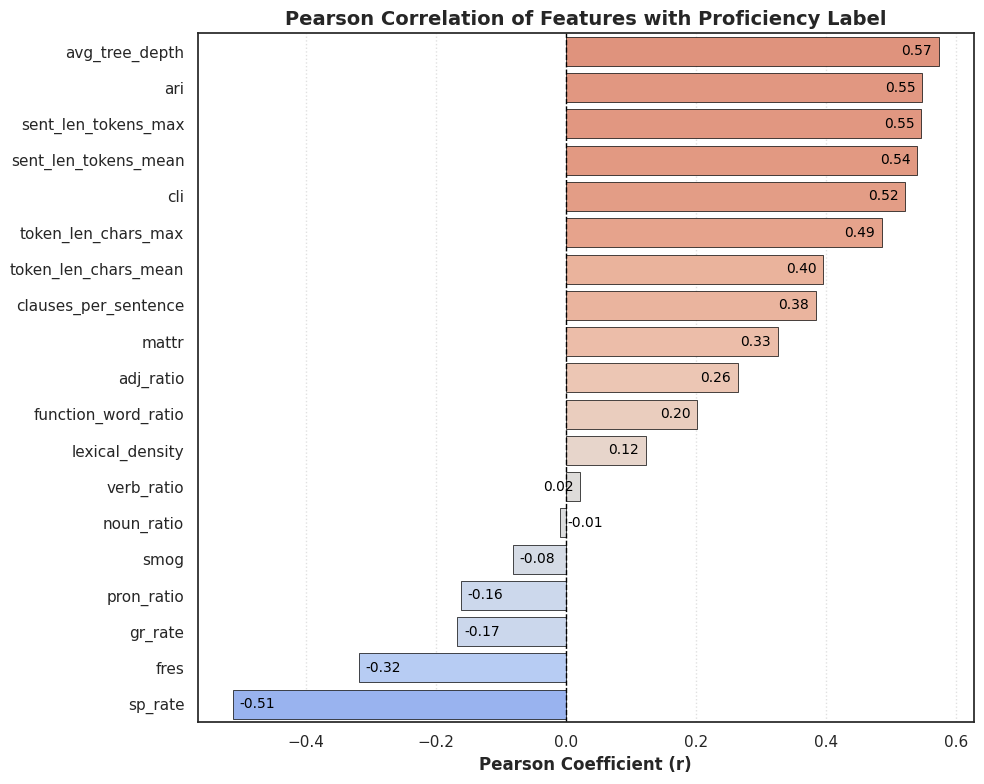

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Setup
plt.figure(figsize=(10, 8))
sns.set_theme(style="white")

# Calculate correlation with the LABEL only
# (We sort them so the strongest features are at the top)

corr_pearson = features_df.corrwith(features_df['label'], method='pearson').sort_values(ascending=False).drop('label')

norm = plt.Normalize(-1, 1)
colors = [cm.coolwarm(norm(v)) for v in corr_pearson.values]

# Plot
# 3. Create Barplot
ax = sns.barplot(
    x=corr_pearson.values,
    y=corr_pearson.index,
    palette=colors,
    edgecolor="black", # Adds a thin border to bars (looks sharper)
    linewidth=0.5
)

# Styling
plt.title("Pearson Correlation of Features with Proficiency Label", fontsize=14, fontweight='bold')
plt.xlabel("Pearson Coefficient (r)", fontsize=12, fontweight='bold')
plt.ylabel("")

plt.axvline(0, color='black', linewidth=1, linestyle='--')
plt.grid(axis='x', linestyle=':', alpha=0.6)

# Add values to bars
for i, v in enumerate(corr_pearson.values):
    # Position text slightly inside or outside based on value
    offset = 0.01 if v < 0 else -0.01
    ha = 'left' if v < 0 else 'right'
    ax.text(v + offset, i, f"{v:.2f}", va='center', ha=ha, fontsize=10, color='black')

plt.tight_layout()
plt.savefig("feature_correlations.png", dpi=300)
plt.show()

In [ ]:
import matplotlib.cm as cm

/tmp/ipython-input-4006329903.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


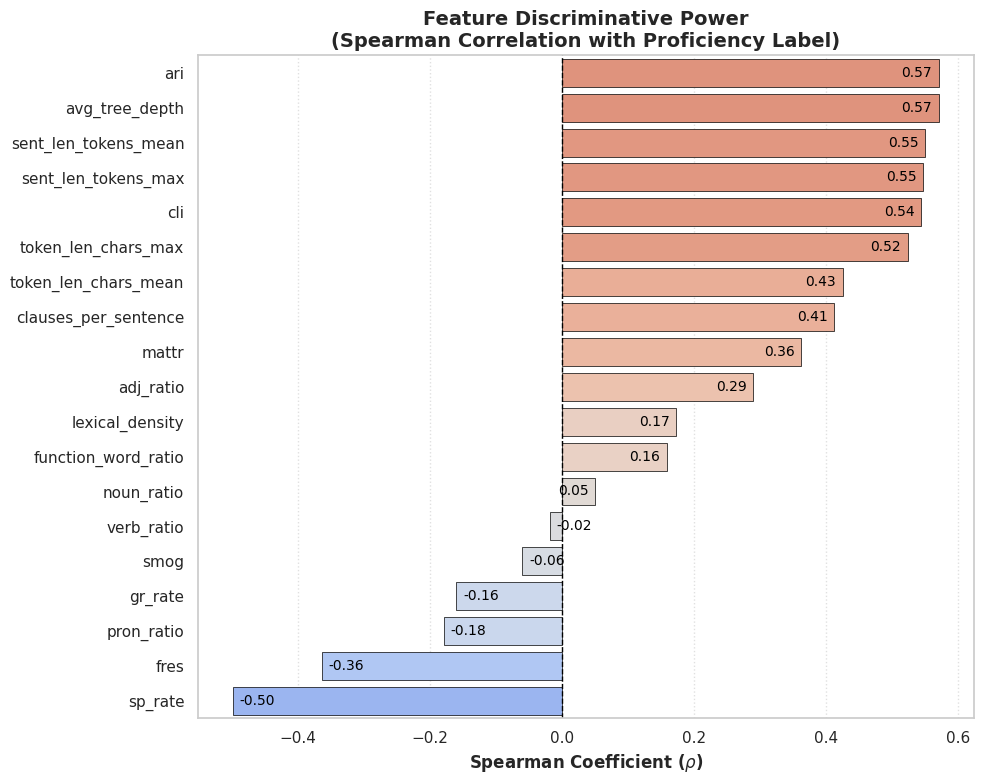

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Calculate Spearman Correlation (Ordinal-safe)
# Drop the label so it doesn't correlate with itself
corr_spearman = features_df.corrwith(features_df['label'], method='spearman').sort_values(ascending=False).drop('label')

norm = plt.Normalize(-1, 1)
colors = [cm.coolwarm(norm(v)) for v in corr_spearman.values]

# 2. Setup the Plot
plt.figure(figsize=(10, 8))
sns.set_theme(style="whitegrid") # Clean white background with grid

# 3. Create Barplot
ax = sns.barplot(
    x=corr_spearman.values,
    y=corr_spearman.index,
    palette=colors,
    edgecolor="black", # Adds a thin border to bars (looks sharper)
    linewidth=0.5
)

# 4. Styling Polish
plt.title("Feature Discriminative Power\n(Spearman Correlation with Proficiency Label)", fontsize=14, fontweight='bold')
plt.xlabel("Spearman Coefficient ($\\rho$)", fontsize=12, fontweight='bold')
plt.ylabel("")

# 5. Add Vertical Zero Line
plt.axvline(0, color='black', linewidth=1, linestyle='--')
plt.grid(axis='x', linestyle=':', alpha=0.6)


for i, v in enumerate(corr_spearman.values):
    # Position text slightly inside or outside based on value
    offset = 0.01 if v < 0 else -0.01
    ha = 'left' if v < 0 else 'right'
    ax.text(v + offset, i, f"{v:.2f}", va='center', ha=ha, fontsize=10, color='black')

plt.tight_layout()
plt.savefig("feature_importance_spearman.png", dpi=300)
plt.show()

/tmp/ipython-input-230869564.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-230869564.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-230869564.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-230869564.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-230869564.py:18: FutureWarning: 

Passing `pa

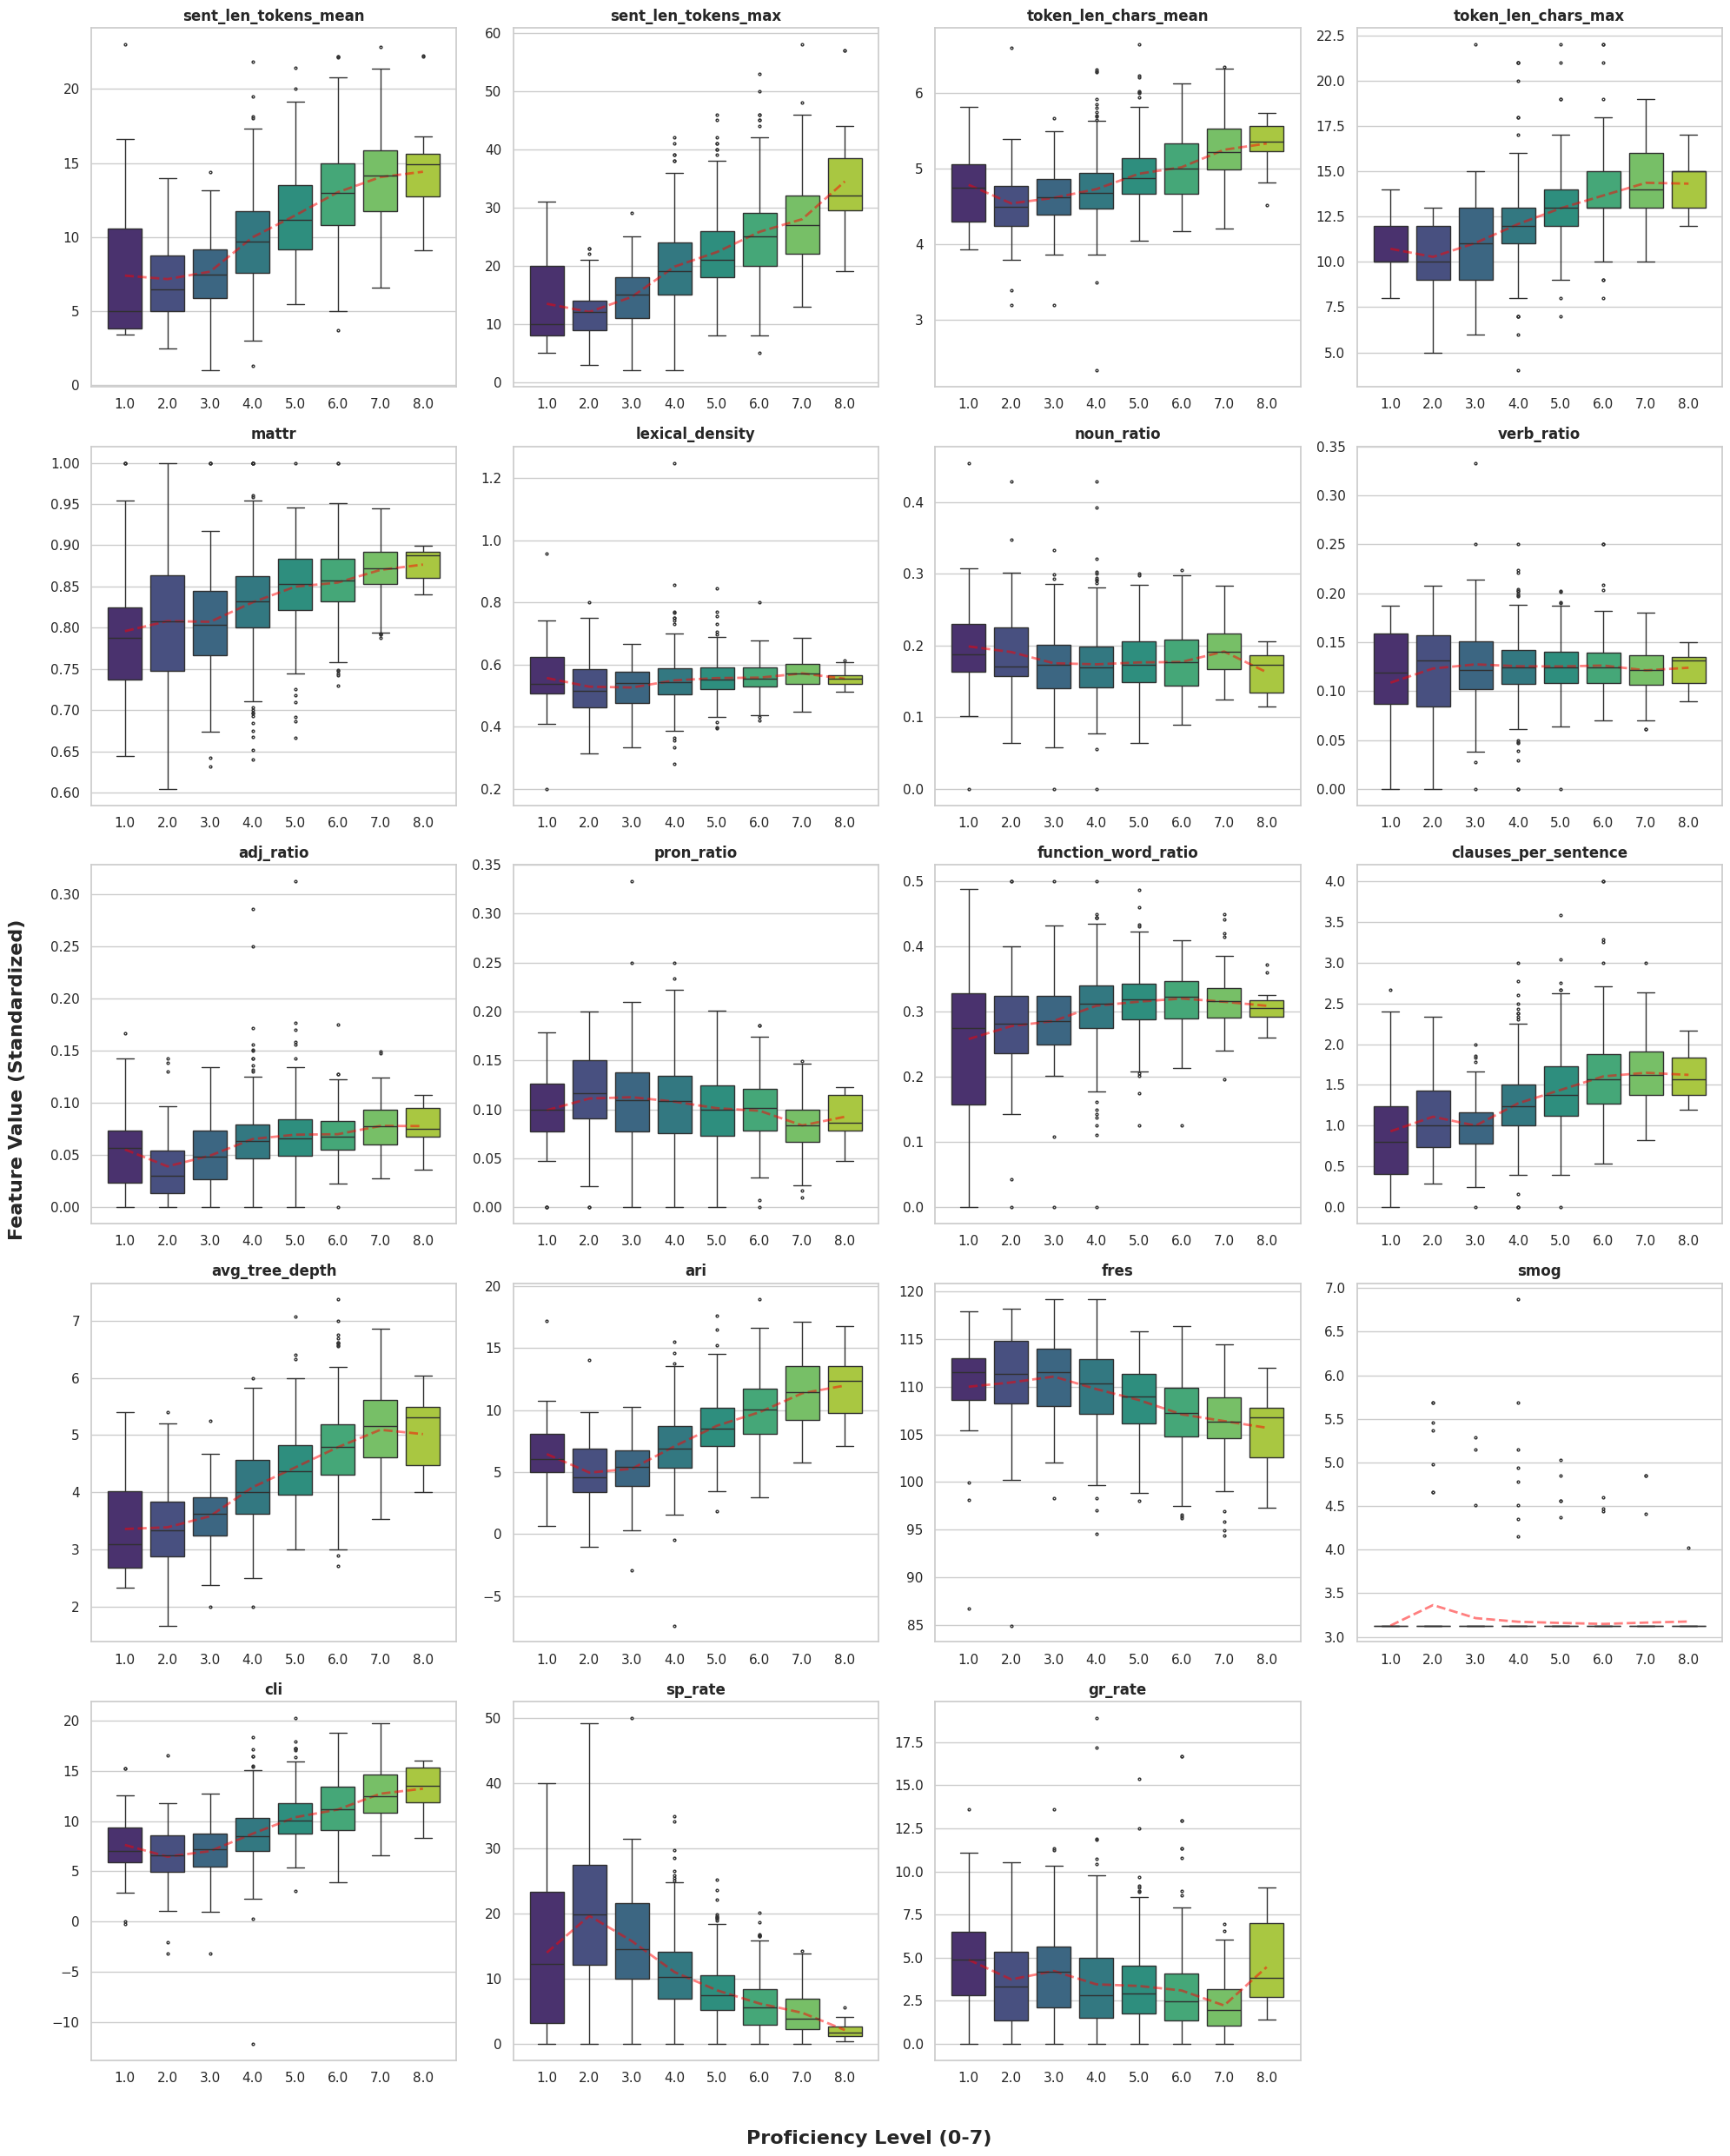

In [ ]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

# Get all feature names (excluding label)
feature_cols = [c for c in features_df.columns if c != 'label']
n_features = len(feature_cols)
n_cols = 4
n_rows = math.ceil(n_features / n_cols)

plt.figure(figsize=(20, 5 * n_rows)) # Big figure size
sns.set_theme(style="whitegrid")

for i, feature in enumerate(feature_cols):
    plt.subplot(n_rows, n_cols, i + 1)

    # Boxplot with consistent 0-7 ordering
    sns.boxplot(
        data=features_df,
        x='label',
        y=feature,
        palette="viridis",
        linewidth=1,
        fliersize=2,
        order=sorted(features_df['label'].unique())
    )

    # The "Red Trend Line" - helps visually track progress even for noisy features
    means = features_df.groupby('label')[feature].mean()
    plt.plot([x-1 for x in means.index], means.values, color='red', alpha=0.5, linewidth=2, linestyle='--')

    plt.title(feature, fontsize=12, fontweight='bold')
    plt.xlabel("")
    plt.ylabel("")

# Global Labels
plt.figtext(0.5, 0.01, 'Proficiency Level (0-7)', ha='center', fontsize=16, fontweight='bold')
plt.figtext(0.005, 0.5, 'Feature Value (Standardized)', va='center', rotation='vertical', fontsize=16, fontweight='bold')

plt.tight_layout(rect=[0.02, 0.03, 1, 1])
plt.savefig("feature_boxplots_narrative.png", dpi=300)
plt.show()

In [ ]:
print(features_df['smog'].value_counts().head())

smog
3.129100    1108
5.683918       3
4.851558       3
4.655896       2
5.148861       2
Name: count, dtype: int64


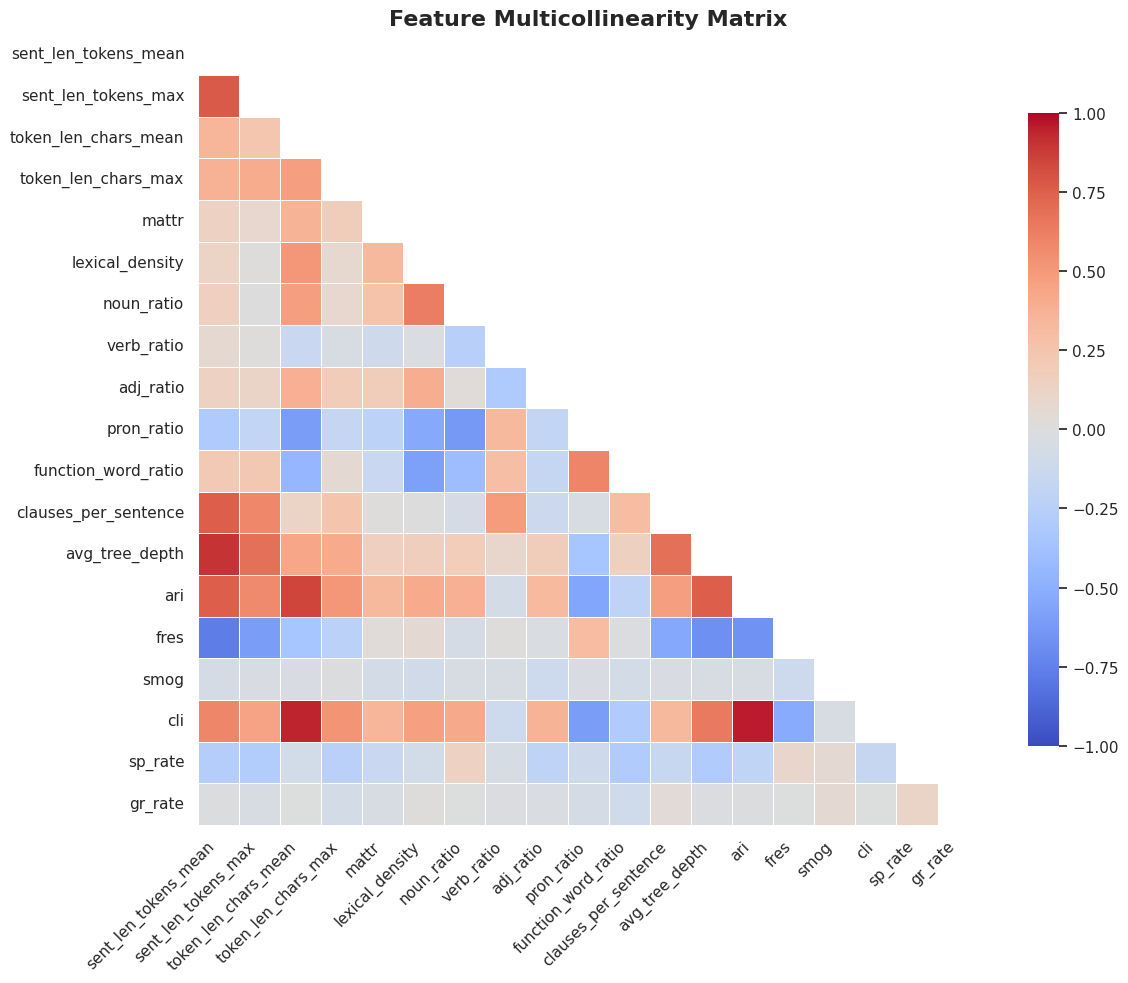

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# 1. Select only your 19 features (drop the label)
features_only = features_df.drop(columns=['label'])

# 2. Calculate Correlation Matrix
corr = features_only.corr()

# 3. Create a mask to hide the upper triangle (optional, but cleaner)
mask = np.triu(np.ones_like(corr, dtype=bool))

# 4. Plot
plt.figure(figsize=(12, 10))
sns.set_theme(style="white")
sns.heatmap(
    corr,
    mask=mask,
    cmap='coolwarm',
    center=0,
    vmin=-1, vmax=1,
    annot=False,          # Turn to True if you want numbers, but it gets crowded
    fmt='.1f',
    linewidths=.5,
    cbar_kws={"shrink": .8}
)

plt.title("Feature Multicollinearity Matrix", fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("feature_heatmap.png", dpi=300)
plt.show()

/tmp/ipython-input-970995214.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations_with_length.values, y=correlations_with_length.index, palette=colors_leak)


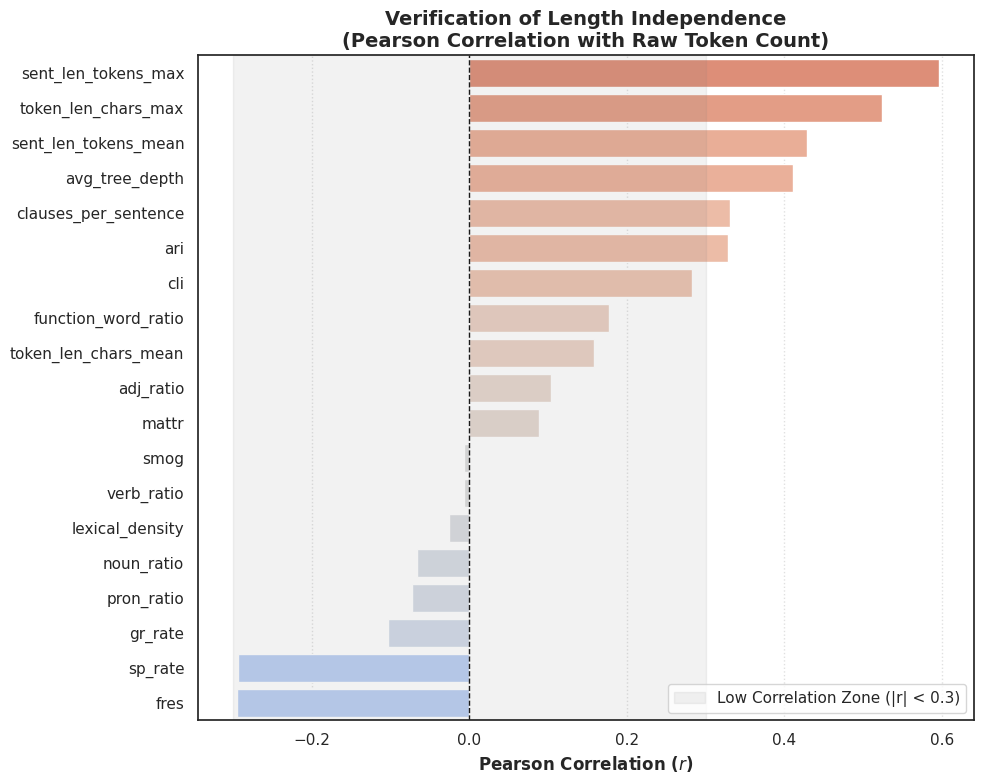

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import spacy

# 1. Calculate Raw Length (just for this check, don't use it for training!)
# Simple approximation: just count spaces + 1, or use spacy if you want precision
df['raw_token_count'] = df['text'].apply(lambda x: len(x.split()))

# 2. Calculate Correlation of Features with Raw Length
# We drop the label and the raw length itself from the rows
correlations_with_length = features_df.join(df['raw_token_count']).corrwith(df['raw_token_count'])
correlations_with_length = correlations_with_length.drop(['label', 'raw_token_count']).sort_values(ascending=False)


norm_leak = plt.Normalize(-1, 1)
colors_leak = [cm.coolwarm(norm_leak(v)) for v in correlations_with_length.values]

# 3. Plot
plt.figure(figsize=(10, 8))
# Use a diverging palette: Red = High Correlation (Warning?), Blue = Negative
sns.barplot(x=correlations_with_length.values, y=correlations_with_length.index, palette=colors_leak)

plt.title("Verification of Length Independence\n(Pearson Correlation with Raw Token Count)", fontsize=14, fontweight='bold')
plt.xlabel("Pearson Correlation ($r$)", fontsize=12, fontweight='bold')
plt.ylabel("")
plt.axvline(0, color='k', linestyle='--', linewidth=1)
plt.grid(axis='x', linestyle=':', alpha=0.6)

# Add green/red zones for interpretation
plt.axvspan(-0.3, 0.3, color='grey', alpha=0.1, label='Low Correlation Zone (|r| < 0.3)')
plt.legend(loc='lower right')

plt.tight_layout()
plt.savefig("length_leakage_check.png", dpi=300)
plt.show()